# MOVIE RECOMMENDER SYSTEM

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

### Loading Dataset

In [2]:
credits=pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\GREAT LEARNING COURSES\CAPSTONE PROJECT\FINAL CSVs\credits.csv")
keywords=pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\GREAT LEARNING COURSES\CAPSTONE PROJECT\FINAL CSVs\keywords.csv")
links=pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\GREAT LEARNING COURSES\CAPSTONE PROJECT\FINAL CSVs\links.csv")
org_movies=pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\GREAT LEARNING COURSES\CAPSTONE PROJECT\FINAL CSVs\movies_metadata.csv")
ratings=pd.read_csv(r"C:\Users\nisha\OneDrive\Desktop\GREAT LEARNING COURSES\CAPSTONE PROJECT\FINAL CSVs\ratings.csv")



In [3]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
credits.loc[1,'cast']

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [5]:
credits.loc[1,'crew']

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [6]:
credits.loc[1,'id']

8844

In [7]:
credits.shape

(45476, 3)

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [9]:
keywords.head() #ID is movie ID

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [10]:
keywords.loc[0,'id']

862

In [11]:
keywords.loc[0,'keywords'] #Wodrds related to the movie

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [12]:
keywords.shape

(46419, 2)

In [13]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


***links file not needed as it contains only Ids on various movie database we have tmdb id in other files as well***

In [14]:
links.head(20)  

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [15]:
links.shape

(45843, 3)

In [16]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [17]:
org_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**Each star is equal to 2 points(1-10)---ratings in term of stars 1 to 5** 

In [18]:
org_movies.shape  #from file dataframe

(45466, 24)

In [19]:
org_movies=org_movies[org_movies['vote_count']>=50] #for better recommendation model(cosine similarity code was taking lot of time and memory also 45000 rows and 45000 column pairwise cosine similarity)
# We can get the reliable rating of the movie if it is rated by more people

In [20]:
org_movies.shape

(9151, 24)

In [21]:
org_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9151 entries, 0 to 45441
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9151 non-null   object 
 1   belongs_to_collection  2003 non-null   object 
 2   budget                 9151 non-null   object 
 3   genres                 9151 non-null   object 
 4   homepage               2791 non-null   object 
 5   id                     9151 non-null   object 
 6   imdb_id                9151 non-null   object 
 7   original_language      9151 non-null   object 
 8   original_title         9151 non-null   object 
 9   overview               9115 non-null   object 
 10  popularity             9151 non-null   object 
 11  poster_path            9151 non-null   object 
 12  production_companies   9151 non-null   object 
 13  production_countries   9151 non-null   object 
 14  release_date           9150 non-null   object 
 15  rev

In [22]:
org_movies['budget']=org_movies['budget'].astype(int) #Changing Budget data type (in USD)

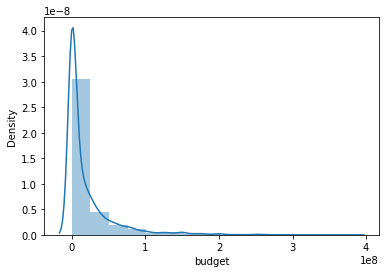

In [23]:
sns.distplot(org_movies['budget'],bins=15)  # Most of the movies are have the budget upto 
                                            # 25000000 USD(25 million usd) 0.25*10^8
plt.show()

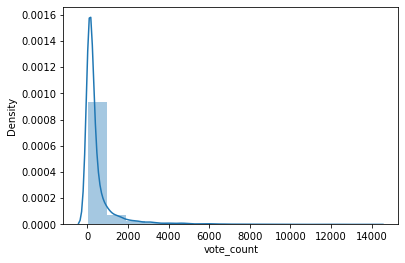

In [24]:
sns.distplot(org_movies['vote_count'],bins=15)  #most of the movies are rated by upto 1000 users
plt.show()

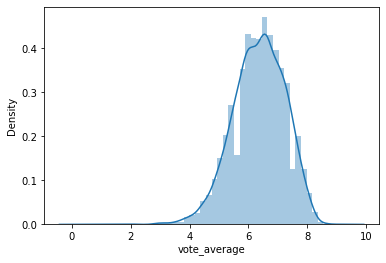

In [25]:
sns.distplot(org_movies['vote_average'])
plt.show()                                 #Most of the movies have average rating of 6.5

In [26]:
org_movies.loc[0,'belongs_to_collection']

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [27]:
org_movies.loc[0,'genres']

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [28]:
org_movies.loc[1,'genres']

"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]"

In [29]:
org_movies.loc[2,'genres']

"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]"

In [30]:
org_movies.loc[999,'genres']

"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]"

*Different Genres have Unique IDs Comedy:35,Animation:16,Family:10751,Adventure:12,Fantasy:14,
Family:10751,Romance:10749 etc.*

In [31]:
org_movies.loc[0,'spoken_languages']

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [32]:
org_movies.loc[0,'overview']

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [33]:
org_movies.shape

(9151, 24)

In [34]:
org_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9151 entries, 0 to 45441
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9151 non-null   object 
 1   belongs_to_collection  2003 non-null   object 
 2   budget                 9151 non-null   int32  
 3   genres                 9151 non-null   object 
 4   homepage               2791 non-null   object 
 5   id                     9151 non-null   object 
 6   imdb_id                9151 non-null   object 
 7   original_language      9151 non-null   object 
 8   original_title         9151 non-null   object 
 9   overview               9115 non-null   object 
 10  popularity             9151 non-null   object 
 11  poster_path            9151 non-null   object 
 12  production_companies   9151 non-null   object 
 13  production_countries   9151 non-null   object 
 14  release_date           9150 non-null   object 
 15  rev

In [35]:
org_movies.isnull().sum()

adult                       0
belongs_to_collection    7148
budget                      0
genres                      0
homepage                 6360
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   36
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date                1
revenue                     0
runtime                     1
spoken_languages            0
status                      1
tagline                  2059
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [36]:
org_movies['original_language'].value_counts(normalize=True).sort_values(ascending=False).head(10)

en    0.816632
fr    0.057043
it    0.025134
ja    0.024150
es    0.012130
de    0.011911
ko    0.006994
cn    0.006666
hi    0.006229
zh    0.005901
Name: original_language, dtype: float64

In [37]:
org_movies['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [38]:
org_movies['status'].value_counts()

Released           9139
Post Production       4
In Production         4
Rumored               2
Planned               1
Name: status, dtype: int64

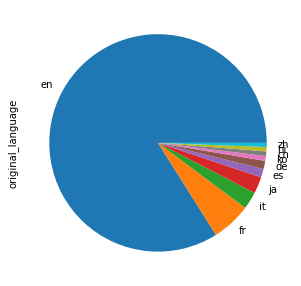

In [39]:
plt.figure(figsize=(5,5))
org_movies['original_language'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='pie')
plt.show() #Most of the movies around 70 percent are English Languages

In [40]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [41]:
ratings.groupby('movieId')['movieId'].count().sort_values(ascending=False) #Number of ratings on a movie 

movieId
356       91921
318       91082
296       87901
593       84078
2571      77960
          ...  
151575        1
151581        1
113014        1
151589        1
176275        1
Name: movieId, Length: 45115, dtype: int64

In [42]:
ratings.groupby('movieId')['movieId'].count().sort_values(ascending=False).mean() #Mean Number of ratings on a movie 

576.8433780339134

In [43]:
ratings.groupby('userId')['userId'].count().sort_values(ascending=False) #Number of ratings given by each user

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
30155         1
9641          1
164717        1
243426        1
234625        1
Name: userId, Length: 270896, dtype: int64

In [44]:
ratings.groupby('userId')['userId'].count().sort_values(ascending=False).mean() # An average user has rated around 100 movies

96.06745393065974

In [45]:
ratings.shape

(26024289, 4)

In [46]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [47]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

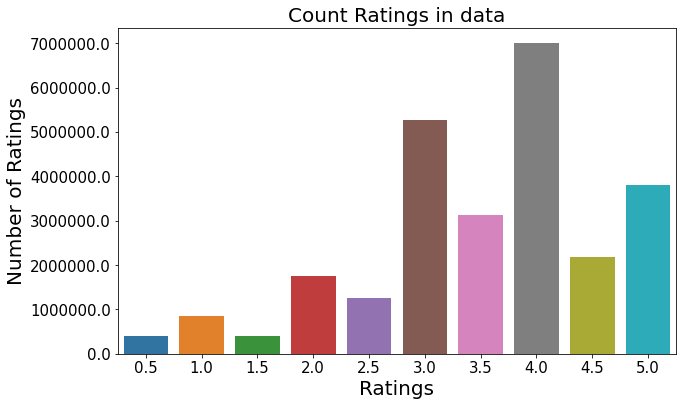

In [48]:
plt.figure(figsize = (10, 6))                     # Most of the Ratings given by users for various movies is 4
ax = sns.countplot(x="rating", data=ratings)
ax.set_yticklabels([num
for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

### Merging Files on id
* Credits
* Keywords
* Movies


In [49]:
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [50]:
keywords.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [51]:
org_movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [52]:
df=pd.merge(credits,keywords,on='id')

In [53]:
df.head()

,cast,crew,id,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [54]:
org_movies['id']=org_movies['id'].astype(int)  #data type of ids in other dataframes was of integer type

In [55]:
merged_movies=org_movies.merge(df,on='id')

In [56]:
merged_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
4,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."


In [57]:
print('Rows =',merged_movies.shape[0])
print('Columns =',merged_movies.shape[1])


Rows = 9297
Columns = 27


In [58]:
merged_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9297 entries, 0 to 9296
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  9297 non-null   object 
 1   belongs_to_collection  2025 non-null   object 
 2   budget                 9297 non-null   int32  
 3   genres                 9297 non-null   object 
 4   homepage               2838 non-null   object 
 5   id                     9297 non-null   int32  
 6   imdb_id                9297 non-null   object 
 7   original_language      9297 non-null   object 
 8   original_title         9297 non-null   object 
 9   overview               9259 non-null   object 
 10  popularity             9297 non-null   object 
 11  poster_path            9297 non-null   object 
 12  production_companies   9297 non-null   object 
 13  production_countries   9297 non-null   object 
 14  release_date           9296 non-null   object 
 15  reve

# Missing Value Treatment

In [59]:
merged_movies.isnull().sum()

adult                       0
belongs_to_collection    7272
budget                      0
genres                      0
homepage                 6459
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   38
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date                1
revenue                     0
runtime                     1
spoken_languages            0
status                      1
tagline                  2130
title                       0
video                       0
vote_average                0
vote_count                  0
cast                        0
crew                        0
keywords                    0
dtype: int64

In [60]:
merged_movies['title'].fillna(merged_movies['original_title'],inplace=True) #Null Values in title have been filled using Original title(Imputation)

In [61]:
merged_movies['overview'].fillna(merged_movies['tagline'],inplace=True) # Null Values in Overview have been filled using tagline(Imputation)

### Selection Of important Columns from Above Dataframe which affect our model

* id
* title
* genres
* overview
* cast
* crew
* keywords

In [62]:
movies=merged_movies[['id',
'title',
'genres',
'overview',
'cast',
'crew',
'keywords']]


In [63]:
movies.isnull().sum()

id           0
title        0
genres       0
overview    38
cast         0
crew         0
keywords     0
dtype: int64

In [64]:
#Dropping Missing Values 
movies.dropna(inplace=True)

In [65]:
movies.isnull().sum()

id          0
title       0
genres      0
overview    0
cast        0
crew        0
keywords    0
dtype: int64

**Missing Values are treated**

## Duplicate Value Treatment  

In [66]:
movies[movies.duplicated()] 

,id,title,genres,overview,cast,crew,keywords
2109,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When Molly Hale's sadness of her father's disa...,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de...","[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
2110,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When Molly Hale's sadness of her father's disa...,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de...","[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
2111,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When Molly Hale's sadness of her father's disa...,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de...","[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
2112,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When Molly Hale's sadness of her father's disa...,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de...","[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
2113,10991,Pokémon: Spell of the Unknown,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When Molly Hale's sadness of her father's disa...,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de...","[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
...,...,...,...,...,...,...,...
8618,329809,Courted,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...","When a feared judge of the French court, Xavie...","[{'cast_id': 5, 'character': 'Michel Racine', ...","[{'credit_id': '54fef052c3a36810a4001846', 'de...","[{'id': 6148, 'name': 'court'}, {'id': 8881, '..."
8620,352025,Un plus une,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",A successful film composer falls in love when ...,"[{'cast_id': 1, 'character': 'Antoine Abeilard...","[{'credit_id': '55b7a04ac3a3682274002665', 'de...","[{'id': 9799, 'name': 'romantic comedy'}]"
8622,342281,Family For Rent,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","Forty-year-old Paul-André is a timid, rather i...","[{'cast_id': 1, 'character': 'Paul-André', 'cr...","[{'credit_id': '5568649fc3a3681c650024c9', 'de...","[{'id': 5011, 'name': 'deal'}, {'id': 6142, 'n..."
8624,341392,Lolo,"[{'id': 35, 'name': 'Comedy'}]","On holiday in the south of France, chic Parisi...","[{'cast_id': 10, 'character': 'Violette', 'cre...","[{'credit_id': '55603650c3a3683b52003dd9', 'de...","[{'id': 90, 'name': 'paris'}, {'id': 5091, 'na..."


In [67]:
movies.drop_duplicates(inplace=True)

In [68]:
movies.duplicated().sum()  #Duplicate Values are treated

0

In [69]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [70]:
ratings.duplicated().sum() #No Duplicates In Ratings

0

In [71]:
ratings.groupby('userId')['userId'].count().sort_values(ascending=False)  #Number Of Ratings Given By Each User

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
30155         1
9641          1
164717        1
243426        1
234625        1
Name: userId, Length: 270896, dtype: int64

In [72]:
ratings.groupby('movieId')['movieId'].count().sort_values(ascending=False) #Number Of Ratings given to a Movie 

movieId
356       91921
318       91082
296       87901
593       84078
2571      77960
          ...  
151575        1
151581        1
113014        1
151589        1
176275        1
Name: movieId, Length: 45115, dtype: int64

# POPULARITY BASED RECOMMENDATION SYSTEM

**Building Popularity Based Recommendation System considering Top 10 movies with highest vote_average on condition being rated by atleast 2000 Users** 

In [73]:
#org_movies=Original Movie file
#merged_movies=Dataset After being merged
#movies=Selected columns from merged_movies
#pop_movies=Copy of org_movies for popularity based recommendation system

In [74]:
pop_movies=merged_movies.copy()

In [75]:
pop_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
4,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."


In [76]:
pop_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,9297.0,1.879326e+07,3.444270e+07,0.0,0.0,3000000.0,23600000.0,3.800000e+08
id,9297.0,7.863374e+04,1.135603e+05,5.0,9571.0,15664.0,93856.0,4.608460e+05
revenue,9297.0,5.369965e+07,1.344801e+08,0.0,0.0,2500000.0,45284974.0,2.787965e+09
runtime,9296.0,1.049065e+02,2.970155e+01,0.0,92.0,102.0,115.0,8.770000e+02
vote_average,9297.0,6.356104e+00,8.887224e-01,0.0,5.8,6.4,7.0,9.500000e+00
vote_count,9297.0,5.002290e+02,9.970888e+02,50.0,81.0,157.0,427.0,1.407500e+04


In [77]:
pop_movies.describe()[['vote_count']].T

,count,mean,std,min,25%,50%,75%,max
vote_count,9297.0,500.228999,997.08881,50.0,81.0,157.0,427.0,14075.0


In [78]:
pop_movies.isnull().sum()

adult                       0
belongs_to_collection    7272
budget                      0
genres                      0
homepage                 6459
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   38
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date                1
revenue                     0
runtime                     1
spoken_languages            0
status                      1
tagline                  2130
title                       0
video                       0
vote_average                0
vote_count                  0
cast                        0
crew                        0
keywords                    0
dtype: int64

In [79]:
pop_movies=pop_movies[pop_movies['vote_count']>=2000].sort_values(by=['vote_average','vote_count'],ascending=False).head(10)[['title','id','vote_average','vote_count']]
pop_movies

,title,id,vote_average,vote_count
170,The Shawshank Redemption,278,8.5,8358.0
409,The Godfather,238,8.5,6024.0
4812,The Dark Knight,155,8.3,12269.0
1507,Fight Club,550,8.3,9678.0
159,Pulp Fiction,680,8.3,8670.0
286,Schindler's List,424,8.3,4436.0
7215,Whiplash,244786,8.3,4376.0
2670,Spirited Away,129,8.3,3968.0
1157,Life Is Beautiful,637,8.3,3643.0
597,The Godfather: Part II,240,8.3,3418.0


In [80]:
pop_movies

,title,id,vote_average,vote_count
170,The Shawshank Redemption,278,8.5,8358.0
409,The Godfather,238,8.5,6024.0
4812,The Dark Knight,155,8.3,12269.0
1507,Fight Club,550,8.3,9678.0
159,Pulp Fiction,680,8.3,8670.0
286,Schindler's List,424,8.3,4436.0
7215,Whiplash,244786,8.3,4376.0
2670,Spirited Away,129,8.3,3968.0
1157,Life Is Beautiful,637,8.3,3643.0
597,The Godfather: Part II,240,8.3,3418.0


# CONTENT BASED FILTERING

### A new DataFrame 'cont_movies' will be created having three columns 'id','title','tags'



* **In 'Id' column we will have the tmdbIds(The Movie Database)**


* **In 'title' column we will have name of the movies**


* **In 'tags' column we will have data of merged columns of 'movies' dataframe containing 'genres', 'overview', 'cast', 'crew', 'keywords'** 

In [81]:
movies.head()

,id,title,genres,overview,cast,crew,keywords
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
4,949,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","Obsessive master thief, Neil McCauley leads a ...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."


In [82]:
movies.isnull().sum()  #NO MISSING VALUES

id          0
title       0
genres      0
overview    0
cast        0
crew        0
keywords    0
dtype: int64

In [83]:
movies.duplicated().sum()  # NO DUPLICATED VALUES

0

In [84]:
movies.head()

,id,title,genres,overview,cast,crew,keywords
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
4,949,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","Obsessive master thief, Neil McCauley leads a ...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."


**Getting the list of genres from 'genres' column and list of keywords from 'keywords' column which is in the form of list of dictionary ( List of String type)**

In [85]:
movies.iloc[0,2]  #lIST OF STRING TYPE

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

**Creating a function to do the task**

In [86]:
import ast  #Used to convert list of string type to list so that our function can work.
ast.literal_eval("[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]")

#OUTPUT IS A LIST

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [87]:
def convert(obj):                           #obj is single cell of the genres column
    l=[]
    for i in ast.literal_eval(obj):         #ast.literal_eval is used to deal with the string type of list
        l.append(i['name'])
    return l        

In [88]:
movies['genres']=movies['genres'].apply(convert)
movies['keywords']=movies['keywords'].apply(convert)

In [89]:
movies.head() #We can see the list of genres in 'genres' column and list of keywords in 'keywords' column.

,id,title,genres,overview,cast,crew,keywords
0,862,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o..."
3,11862,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug..."
4,949,Heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[robbery, detective, bank, obsession, chase, s..."


**For 'cast' column we would select top 4 important actors in the movie(We are interested in name of the actors not in their characters) as actors are the lifeline for a movie**

In [90]:
movies.loc[0,'cast'] #Each dictionary in the list contains the information about the cast(cast_id,character played,credit_id,gender,name,order etc.)
#But we are interested only in the name of top 4 important actors.

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

**Using Same User Defined function as in the case of genres and keywords but with the addition of counter to select names of top 4 actors** 

In [91]:
def convert_4(obj):                         #obj is single cell of the cast column
    l=[]
    counter=0
    for i in ast.literal_eval(obj):         #ast.literal_eval is used to deal with the string type of list
        if counter!=4:
            l.append(i['name'])
            counter+=1
        else:
            break
    return l        

In [92]:
movies['cast']=movies['cast'].apply(convert_4)

In [93]:
movies.head()

,id,title,genres,overview,cast,crew,keywords
0,862,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o..."
3,11862,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug..."
4,949,Heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[robbery, detective, bank, obsession, chase, s..."


In [94]:
movies.loc[1,'cast']

['Robin Williams', 'Jonathan Hyde', 'Kirsten Dunst', 'Bradley Pierce']

**As we can see, we got the name of the top 4 actors of the movies by applying 'convert_4' function**

**From 'Crew' column we will fetch Director's name as Director is an important part of a movie on basis of which movies can be recommended** 

In [95]:
movies.loc[0,'crew']

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [96]:
ast.literal_eval(movies.loc[0,'crew'])

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [97]:
 def director(obj):
        l=[]
        for i in ast.literal_eval(obj):
            if i['job']=='Director':
                l.append(i['name'])
                break
        return l        
            
            
            
            

In [98]:
movies['crew']=movies['crew'].apply(director)

In [99]:
movies.head()

,id,title,genres,overview,cast,crew,keywords
0,862,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney]",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],"[board game, disappearance, based on children'..."
2,15602,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,11862,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug..."
4,949,Heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[Michael Mann],"[robbery, detective, bank, obsession, chase, s..."


In [100]:
movies.shape

(9108, 7)

**As we can see, we got the name of the director of the movies by applying 'director' function**

In [101]:
movies.rename({'id':'Id','title':'Title','genres':'Genres','cast':'Cast','crew':'Director','keywords':'Keywords','overview':'Overview'},axis=1,inplace=True)

In [102]:
movies[movies['Title']=='Spectre']

,Id,Title,Genres,Overview,Cast,Director,Keywords
8029,206647,Spectre,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[spy, based on novel, secret agent, sequel, mi..."


In [103]:
movies[movies['Title']=='Avatar']

,Id,Title,Genres,Overview,Cast,Director,Keywords
5374,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon..."


* **Need to apply a sort of transformation in which we will have to remove spaces so that the words with spaces don't form two separate tags
rather we want one tag for one word,we don't want two tags to be created for a single word due to spaces between them
Therefore we would remove spaces.**


* **Like 'Sam Mendes'(Director of the movie 'Spectre') will create two separate tags as 'Sam'and 'Mendes'**


* **Similarly 'Sam Worthington'(Cast of the movie 'Avatar') will also create two separate tags as 'Sam' and 'Worthington'**


* **So when model will use the tags for recommendation then it may give inaccurate recommendations because of same tags i.e. 'Sam' in both movies considering them as same tags**


* **But in reality one is an actor and other is a director.So to handle this inaccuracy we will remove spaces so that two separate tags are formed as 'SamWorthington' and 'SamMendes'.** 

In [104]:
movies['Director']

0               [John Lasseter]
1                [Joe Johnston]
2               [Howard Deutch]
3               [Charles Shyer]
4                [Michael Mann]
                 ...           
9292    [Philippe de Chauveron]
9293         [Jean-Marie Poiré]
9294           [Shane Van Dyke]
9295               [Beth David]
9296               [Larry Shaw]
Name: Director, Length: 9108, dtype: object

In [105]:
movies['Genres']=movies['Genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['Keywords']=movies['Keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['Cast']=movies['Cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['Director']=movies['Director'].apply(lambda x:[i.replace(" ","") for i in x])

In [106]:
movies.head()  #As we can see Spaces Are Removed

,Id,Title,Genres,Overview,Cast,Director,Keywords
0,862,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo..."
2,15602,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol..."
3,11862,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh..."
4,949,Heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ...","[AlPacino, RobertDeNiro, ValKilmer, JonVoight]",[MichaelMann],"[robbery, detective, bank, obsession, chase, s..."


#### Dealing with 'Overview' Column

* Converting it into list so that it can be concated with other columns to form tags**

In [107]:
movies.loc[1,'Overview']

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [108]:
movies['Overview']=movies['Overview'].apply(lambda x:x.split())

In [109]:
movies.head()  #Got the Overview in form of the list

,Id,Title,Genres,Overview,Cast,Director,Keywords
0,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]","[When, siblings, Judy, and, Peter, discover, a...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo..."
2,15602,Grumpier Old Men,"[Romance, Comedy]","[A, family, wedding, reignites, the, ancient, ...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol..."
3,11862,Father of the Bride Part II,[Comedy],"[Just, when, George, Banks, has, recovered, fr...","[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh..."
4,949,Heat,"[Action, Crime, Drama, Thriller]","[Obsessive, master, thief,, Neil, McCauley, le...","[AlPacino, RobertDeNiro, ValKilmer, JonVoight]",[MichaelMann],"[robbery, detective, bank, obsession, chase, s..."


In [110]:
movies[movies['Title']=='Avatar']

,Id,Title,Genres,Overview,Cast,Director,Keywords
5374,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ..."


#### Creating 'Tags' Column by concatenating various columns

In [111]:
movies['Tags']=movies['Genres']+movies['Overview']+movies['Cast']+movies['Director']+movies['Keywords']

In [112]:
movies.head()

,Id,Title,Genres,Overview,Cast,Director,Keywords,Tags
0,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family, Led, by, Woody,, A..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]","[When, siblings, Judy, and, Peter, discover, a...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...","[Adventure, Fantasy, Family, When, siblings, J..."
2,15602,Grumpier Old Men,"[Romance, Comedy]","[A, family, wedding, reignites, the, ancient, ...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...","[Romance, Comedy, A, family, wedding, reignite..."
3,11862,Father of the Bride Part II,[Comedy],"[Just, when, George, Banks, has, recovered, fr...","[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...","[Comedy, Just, when, George, Banks, has, recov..."
4,949,Heat,"[Action, Crime, Drama, Thriller]","[Obsessive, master, thief,, Neil, McCauley, le...","[AlPacino, RobertDeNiro, ValKilmer, JonVoight]",[MichaelMann],"[robbery, detective, bank, obsession, chase, s...","[Action, Crime, Drama, Thriller, Obsessive, ma..."


In [113]:
cont_movies=movies[['Id','Title','Tags']]

In [114]:
cont_movies['Tags']=cont_movies['Tags'].apply(lambda x:" ".join(x)) #To Convert Into String

In [115]:
cont_movies

,Id,Title,Tags
0,862,Toy Story,"Animation Comedy Family Led by Woody, Andy's t..."
1,8844,Jumanji,Adventure Fantasy Family When siblings Judy an...
2,15602,Grumpier Old Men,Romance Comedy A family wedding reignites the ...
3,11862,Father of the Bride Part II,Comedy Just when George Banks has recovered fr...
4,949,Heat,Action Crime Drama Thriller Obsessive master t...
...,...,...,...
9292,430365,With Open Arms,Comedy Jean-Étienne Fougerole is an intellectu...
9293,248705,The Visitors: Bastille Day,"Comedy Stuck in the corridors of time, Godefro..."
9294,44918,Titanic 2,Action Adventure Thriller On the 100th anniver...
9295,455661,In a Heartbeat,Family Animation Romance Comedy A closeted boy...


In [116]:
cont_movies['Title'].duplicated().sum()

274

In [117]:
cont_movies['Title'].drop_duplicates(inplace=True) #Removing movies with same title

In [118]:
cont_movies.loc[0,'Tags']

"Animation Comedy Family Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. TomHanks TimAllen DonRickles JimVarney JohnLasseter jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife"

In [119]:
cont_movies['Tags']=cont_movies['Tags'].apply(lambda x:x.lower()) #To Convert Into Lowercase

In [120]:
cont_movies.loc[0,'Tags']

"animation comedy family led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. tomhanks timallen donrickles jimvarney johnlasseter jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife"

In [121]:
cont_movies.loc[1,'Tags']

"adventure fantasy family when siblings judy and peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite alan -- an adult who's been trapped inside the game for 26 years -- into their living room. alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures. robinwilliams jonathanhyde kirstendunst bradleypierce joejohnston boardgame disappearance basedonchildren'sbook newhome recluse giantinsect"

**Given a movie,movies similar to it are found.Movies are taken as points and similarity of movies is found using cosine similarity.**

**The tags are converted into vectors,process is called text vectorization.There are various techniques to perform text vectorization such as bag of words,TF-IDF,Word2Vec.**

**We will be using Bag of words technique in which Tags of all movies are concatenated and a single text is formed containing numerous words(in lakhs)**

**From that text,we will select top 5000 most frequent words(more number of words lead to higher dimensionality which can create problems)(Stop words such as preposition,conjunction,articles which help in sentence formation but does not contribute in the meaning of the sentence) and put them as columns in a table and each movie would form a row. Cells would be filled using frequency of each word in a movie.Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method of extracting features from text here we have extracted most frequent 5000 words from text obtained by merging tags of all movies using bag of words technique) It creates a matrix in which each unique word is represented by a column of the matrix and each movie as a row and value is frequency of the word in a movie** 

**Each Movie is a vector in n dimensional mathematical space where each word forms a dimension.
Using cosine similarity we will find similar vectors(movies).**

### Count Vectorizer

**'abuse' and 'abused' would be made as two separate features.Similarly 'action' and 'actions' will form two separate features.This can lead to the problem of dimensionality.So to treat this we will use technique called stemming.**

In [122]:
import nltk   #Natural Language Toolkit Library
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()

In [123]:
ps.stem('actions') #Convert Into Root Word

'action'

In [124]:
ps.stem('action')

'action'

In [125]:
ps.stem('abused')

'abus'

In [126]:
ps.stem('abuse')

'abus'

In [127]:
def stem(text):  #text is the tag column of each movie #process before making one tag from tags of all movies
    y=[]
    
    for i in text.split():  #i is each word which need to be stemmed
        y.append(ps.stem(i))
        
    return " ".join(y)    


In [128]:
cont_movies['Tags']=cont_movies['Tags'].apply(stem)

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [130]:
cv.fit_transform(cont_movies['Tags']).toarray().shape # 9108 movies(Rows)   5000 words(Columns/Features)

(9108, 5000)

In [131]:
cv.get_feature_names()  #5000 most used words in tags of all movies

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '16th',
 '17',
 '18',
 '18th',
 '19',
 '1920',
 '1930',
 '1940',
 '1944',
 '1945',
 '1950',
 '1950s',
 '1959',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1974',
 '1980',
 '1980s',
 '1990',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2008',
 '2009',
 '2013',
 '20th',
 '24',
 '25',
 '30',
 '300',
 '35',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '80',
 'aamirkhan',
 'aaron',
 'aaroneckhart',
 'aarontaylor',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abroad',
 'abus',
 'academi',
 'academy',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'acquir',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adambrodi',
 'adamsandl',
 'adapt',
 'add',
 'addict',
 'addit',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adolfhitl',
 'adopt',
 'ador',
 'adrienbrodi',
 

In [132]:
vectors=cv.fit_transform(cont_movies['Tags']).toarray()  #each row is a movie and in columns we have 5000 words
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [133]:
vectors[0] #For Movie 'Toy Story' 0,0,1,0,0,1 represents frequency of word in the tag column of toy story movie.
#most of the values will be zero as from lakhs of words 5000 are selected and put as columns

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Cosine Similarity

**In higher dimensions eucledean distance is not the good measure to find similarity(closeness) 
To find the similarity between the vectors we would not use eucledean distance rather we would use 
cosine similarity in which angle between the vectors is measured.Smaller the angle between the 
vectors,similar the movies are. So we would find the cosine similarity(Inversely proportion to cosine distance) of each movie with other movies.** 

In [134]:
from sklearn.metrics.pairwise import cosine_similarity

In [135]:
cosine_similarity(vectors)  #THIS CODE DOES NOT RUN DUE TO MEMORY ERROR FILTER RATINGS ON BASIS OF COUNT THAT IS
#CHOOSE USERS WHO HAVE ATLEAST RATED 50 MOVIES SO THAT RATING DATAFRAME CAN BE REDUCED IN SIZE 


array([[1.        , 0.06482037, 0.04706208, ..., 0.        , 0.35634832,
        0.03984095],
       [0.06482037, 1.        , 0.06406221, ..., 0.02919786, 0.05389681,
        0.        ],
       [0.04706208, 0.06406221, 1.        , ..., 0.        , 0.08804509,
        0.03937496],
       ...,
       [0.        , 0.02919786, 0.        , ..., 1.        , 0.        ,
        0.05383819],
       [0.35634832, 0.05389681, 0.08804509, ..., 0.        , 1.        ,
        0.0993808 ],
       [0.03984095, 0.        , 0.03937496, ..., 0.05383819, 0.0993808 ,
        1.        ]])

**IN ABOVE MATRIX WE ARE GETTING COSINE SIMILARITY OF EACH MOVIE WITH ITSELF AND OTHER 9107 MOVIES**

In [136]:
cosine_similarity(vectors).shape # MATRIX SIZE 9108 ROWS AND 9108 COLUMNS AND BOTH ARE MOVIES AND EACH CELL CONTAIN SIMILARITY BETWEEN MOVIES

(9108, 9108)

In [137]:
similarity=cosine_similarity(vectors)

In [138]:
similarity[0] #SIMILARITY SCORE OF FIRST MOVIE WITH OTHER 9108 MOVIES # AT INDEX 0 SIMILARITY SCORE IS 1 BECAUSE SIMILARITY SCORE OF MOVIE WITH ITSELF IS 1

array([1.        , 0.06482037, 0.04706208, ..., 0.        , 0.35634832,
       0.03984095])

In [139]:
similarity[0].shape

(9108,)

**DIAGONAL OF THE MATRIX WOULD BE 1 SINCE SIMILARITY OF MOVIE WITH ITSELF IS ALWAYS 1**

**1. Define a function which will give 10 similar movies as the movie entered by the user** 

**2.From the movie entered as input we will obtain the index of the movie and using that index we get the array of the movie which 
shows the similarity of that movie with other movies.** 

**3.We will sort the array on basis of similarity score in descending order and get the names of movies similar to the input movie.**  

**4. On Sorting we are not able to hold index position so to hold index position of the movies with their similarity 
score we are using 'enumerate' function and while sorting holding index the sorting is done by index number 
so to sort by similarity score we are using 'key' parameter.**

In [140]:
def recommend(movie):
    movie_index=cont_movies[cont_movies['Title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    
    for i in movies_list:
        print(cont_movies.iloc[i[0]].Title)

In [141]:
recommend('Jumanji')  #Movies related to games are recommended

Wreck-It Ralph
Indie Game: The Movie
The Last Starfighter
Brainscan
Dungeons & Dragons
Rollerball
Stay Alive
The Indian in the Cupboard
Asterix at the Olympic Games
The Spiderwick Chronicles


In [142]:
recommend('Toy Story') # Comedy Computer Animated Kid movies are recommended 

Toy Story 2
Small Fry
Partysaurus Rex
In a Heartbeat
Hawaiian Vacation
Blank Check
Toy Story 3
My Life as a Zucchini
I, Cesar
Lilo & Stitch 2: Stitch has a Glitch


In [143]:
recommend('The Godfather') # Movies Similar to Godfather are recommended

The Godfather: Part II
The Godfather: Part III
Election
Twelve
Jane Austen's Mafia!
At Close Range
Rope
Midnight Express
Nameless Gangster
The Raid 2


In [144]:
recommend('Toy Story 2') # Movies Similar to Toy Story are recommended

Toy Story
Partysaurus Rex
Toy Story 3
Toy Story of Terror!
Uncle Boonmee Who Can Recall His Past Lives
Small Fry
Rob-B-Hood
Khumba
Toys
Blank Check


# Collaborative Filtering Based Recommender System

**We have two Dataframes 'Org_Movies' and 'Ratings' so with the them we would create a matrix(grid) in which we will have usersIds as column Index and movieIds as row index.And in each cell we will have rating given by a user to a particular movie.**

**Only those movies will be considered which have been rated by atleast 50 users(Near to median)(Many users must have watched and rated the movie somewhat popular movie)**  

**And those users would be considered who have rated atleast 100 movies(Near to Median)(They must have watched a lot of movies and will rate a movie appropriately)** 

In [145]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [146]:
ratings.groupby('movieId')['userId'].count().sort_values(ascending=False)

movieId
356       91921
318       91082
296       87901
593       84078
2571      77960
          ...  
151575        1
151581        1
113014        1
151589        1
176275        1
Name: userId, Length: 45115, dtype: int64

In [147]:
ratings.groupby('movieId')['userId'].count().sort_values(ascending=False).median() # Median Number of ratings on a movie
                                                                                    # Mean not used due to Outlier Effect.

8.0

In [148]:
ratings.groupby('userId')['movieId'].count().sort_values(ascending=False)

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
30155         1
9641          1
164717        1
243426        1
234625        1
Name: movieId, Length: 270896, dtype: int64

In [149]:
ratings.groupby('userId')['movieId'].count().sort_values(ascending=False).median() # A median user has rated around 30 movies
                                                                                  # Mean not used due to Outlier Effect.      

30.0

**Selecting ratings of those users who have rated atleast 100 movies**

In [150]:
x=ratings.groupby('userId')['movieId'].count()>=100
x[x]  #64433 users who have rated atleast 100 movies

userId
8         True
11        True
12        True
15        True
16        True
          ... 
270885    True
270887    True
270893    True
270894    True
270896    True
Name: movieId, Length: 64433, dtype: bool

In [151]:
k_users=x[x].index #Fetching UserIds of those users who have rated atleast 100 movies and storing 
                   #them in a variable k_users(Knowledgeable users)

In [152]:
k_users

Int64Index([     8,     11,     12,     15,     16,     20,     24,     30,
                34,     37,
            ...
            270859, 270869, 270871, 270872, 270879, 270885, 270887, 270893,
            270894, 270896],
           dtype='int64', name='userId', length=64433)

In [153]:
filtered_ratings=ratings[ratings['userId'].isin(k_users)] #Filtered on basis of users

In [154]:
filtered_ratings

,userId,movieId,rating,timestamp
204,8,1,4.0,1013443596
205,8,7,2.0,1013442976
206,8,44,3.0,1013442518
207,8,47,4.0,1013443770
208,8,170,3.0,1013442544
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


**Selecting Movies which have been rated by atleast 50 users**

In [155]:
y=filtered_ratings.groupby('movieId')['userId'].count()>=50
y[y]

movieId
1         True
2         True
3         True
4         True
5         True
          ... 
173145    True
173209    True
174053    True
174055    True
174585    True
Name: userId, Length: 12187, dtype: bool

In [156]:
famous_movies=y[y].index

In [157]:
famous_movies

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            170875, 171011, 171763, 171765, 172547, 173145, 173209, 174053,
            174055, 174585],
           dtype='int64', name='movieId', length=12187)

In [158]:
final_ratings=filtered_ratings[filtered_ratings['movieId'].isin(famous_movies)]

In [159]:
final_ratings.shape

(19843330, 4)

In [160]:
final_ratings['movieId'].nunique()

12187

In [161]:
final_ratings['userId'].nunique()

64433

In [162]:
movies.shape

(9108, 8)

In [163]:
movies.head()

,Id,Title,Genres,Overview,Cast,Director,Keywords,Tags
0,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family, Led, by, Woody,, A..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]","[When, siblings, Judy, and, Peter, discover, a...","[RobinWilliams, JonathanHyde, KirstenDunst, Br...",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo...","[Adventure, Fantasy, Family, When, siblings, J..."
2,15602,Grumpier Old Men,"[Romance, Comedy]","[A, family, wedding, reignites, the, ancient, ...","[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...","[Romance, Comedy, A, family, wedding, reignite..."
3,11862,Father of the Bride Part II,[Comedy],"[Just, when, George, Banks, has, recovered, fr...","[SteveMartin, DianeKeaton, MartinShort, Kimber...",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh...","[Comedy, Just, when, George, Banks, has, recov..."
4,949,Heat,"[Action, Crime, Drama, Thriller]","[Obsessive, master, thief,, Neil, McCauley, le...","[AlPacino, RobertDeNiro, ValKilmer, JonVoight]",[MichaelMann],"[robbery, detective, bank, obsession, chase, s...","[Action, Crime, Drama, Thriller, Obsessive, ma..."


In [164]:
movies.rename(columns={'Id':'movieId'},inplace=True)

In [165]:
collab_movies=movies.merge(final_ratings,on='movieId') #Merging Movies and rating dataframe

In [166]:
collab_movies.head()

,movieId,Title,Genres,Overview,Cast,Director,Keywords,Tags,userId,rating,timestamp
0,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family, Led, by, Woody,, A...",2103,5.0,946044912
1,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family, Led, by, Woody,, A...",5380,1.0,878941641
2,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family, Led, by, Woody,, A...",6525,4.0,857388995
3,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family, Led, by, Woody,, A...",7050,3.0,951328483
4,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney]",[JohnLasseter],"[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family, Led, by, Woody,, A...",7238,3.0,988054686


**Making Pivot Table to form the grid**

In [167]:
collab_movies.pivot_table(index='Title',columns='userId',values='rating')

userId,8,11,12,15,16,20,24,30,34,37,...,270859,270869,270871,270872,270879,270885,270887,270893,270894,270896
Title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
"10,000 BC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zatoichi,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zodiac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zombie Flesh Eaters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
pt=collab_movies.pivot_table(index='Title',columns='userId',values='rating')

In [169]:
pt.fillna(0,inplace=True) #Filling nan with 0s

In [170]:
pt.head(40)

userId,8,11,12,15,16,20,24,30,34,37,...,270859,270869,270871,270872,270879,270885,270887,270893,270894,270896
Title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
"10,000 BC",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13 Tzameti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Each movie is a vector in 64431 dimensional space, each dimension representing a user. We will find similarity among vectors using cosine similarity.**

In [171]:
from sklearn.metrics.pairwise import cosine_similarity


In [172]:
cosine_similarity(pt)

array([[1.        , 0.05963457, 0.07004186, ..., 0.06221285, 0.15148185,
        0.06342084],
       [0.05963457, 1.        , 0.05550015, ..., 0.05329756, 0.05062592,
        0.09186231],
       [0.07004186, 0.05550015, 1.        , ..., 0.23664088, 0.16547762,
        0.06838997],
       ...,
       [0.06221285, 0.05329756, 0.23664088, ..., 1.        , 0.14221255,
        0.05153604],
       [0.15148185, 0.05062592, 0.16547762, ..., 0.14221255, 1.        ,
        0.05740273],
       [0.06342084, 0.09186231, 0.06838997, ..., 0.05153604, 0.05740273,
        1.        ]])

In [173]:
similarity_scores=cosine_similarity(pt)

In [174]:
similarity_scores.shape #Above array shows similarity of each movie with other movie on basis of ratings given by the users

(1680, 1680)

In [175]:
similarity_scores[0] #Similarity score of first movie with other 1680 movies(including itself)

array([1.        , 0.05963457, 0.07004186, ..., 0.06221285, 0.15148185,
       0.06342084])

**Now a function would be built in which we will give the name of the movie as input and 
five movies would be recommended**

**1. Fetch index of the movie in grid using name of the movie**

**2. Similarity score of the input movie(using index) with other movies**

**3. Sort the similarity scores in descending order**

**4. Get the names of the 10 most similar movies on basis of ratings.**

In [176]:
def collab_recommend(movie_name):
    #fetch index
    index=np.where(pt.index==movie_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [177]:
collab_recommend('A Beautiful Mind')  # Similar Movies are recommended on basis of ratings 
                                      # provided by the users.

Mary Poppins
Raising Arizona
Good Will Hunting
Batman & Robin
Casablanca
The Edukators
The Lord of the Rings: The Return of the King
Willy Wonka & the Chocolate Factory
The Silence of the Lambs
Talk to Her


In [178]:
collab_recommend('A Boy and His Dog')

The Curious Case of Benjamin Button
Hercules in New York
Bugsy Malone
Hannah and Her Sisters
Before Night Falls
Futurama: Bender's Big Score
Pather Panchali
The Shadow
Bandits
Gomorrah


In [179]:
collab_recommend('Toy Story')

Born into Brothels
Night and Fog
Amores perros
The Wizard of Oz
Paradise Now
The Evil Dead
The China Syndrome
WarGames
Harry Potter and the Half-Blood Prince
Die Hard
